In [8]:
from a_star.two_d_map import map2D
from a_star.a_star_solver import aStar
from safty_ellipse.safty_area import safetyEllipse
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [9]:
def warehouse():
    test_map = np.zeros((1000, 2000))
    test_map[0, :] = 1
    test_map[999, :] = 1
    test_map[:, 0] = 1
    test_map[:, 1999] = 1
    test_map[50:100, 50:350] = 1
    test_map[150:200, 50:350] = 1
    test_map[250:300, 50:350] = 1
    test_map[350:450, 50:350] = 1
    test_map[500:600, 50:350] = 1
    test_map[650:950, 50:100] = 1
    test_map[650:950, 150:250] = 1
    test_map[650:950, 300:350] = 1
    test_map[50:350, 450:550] = 1
    test_map[50:150, 550:750] = 1
    test_map[200:250, 600:750] = 1
    test_map[300:350, 600:750] = 1
    test_map[400:650, 450:600] = 1
    test_map[700:950, 450:600] = 1
    test_map[400:500, 650:750] = 1
    test_map[550:650, 650:750] = 1
    test_map[700:800, 650:750] = 1
    test_map[850:950, 650:750] = 1
    test_map[50:150, 850:1150] = 1
    test_map[150:350, 1050:1150] = 1

    test_map[400:950, 1050:1150] = 1
    test_map[750:950, 1000:1050] = 1

    for pixelRow in range(400, 550):
        for pixelCol in range(850, 1000):
            if np.linalg.norm(np.array([pixelRow, pixelCol]) - np.array([475, 925])) <= 75:
                test_map[pixelRow, pixelCol] = 1

    for pixelRow in range(600, 750):
        for pixelCol in range(850, 1000):
            if np.linalg.norm(np.array([pixelRow, pixelCol]) - np.array([675, 925])) <= 75:
                test_map[pixelRow, pixelCol] = 1

    test_map[800:950, 850:950] = 1
    test_map[50:100, 1250:1950] = 1
    test_map[150:200, 1250:1950] = 1
    test_map[250:300, 1250:1950] = 1
    test_map[350:500, 1250:1950] = 1
    test_map[550:700, 1250:1950] = 1
    test_map[750:950, 1250:1300] = 1
    test_map[800:900, 1300:1400] = 1
    test_map[750:950, 1400:1450] = 1
    test_map[750:950, 1500:1550] = 1
    test_map[800:900, 1550:1650] = 1
    test_map[750:950, 1650:1700] = 1
    test_map[750:950, 1750:1800] = 1
    test_map[800:900, 1800:1900] = 1
    test_map[750:950, 1900:1950] = 1
    return test_map


def ballooned_warehouse():
    test_map = np.zeros((1000, 2000))
    test_map[0, :] = 1
    test_map[999, :] = 1
    test_map[:, 0] = 1
    test_map[:, 1999] = 1
    test_map[40:110, 40:360] = 1
    test_map[140:210, 40:360] = 1
    test_map[240:310, 40:360] = 1
    test_map[340:460, 40:360] = 1
    test_map[500:610, 40:360] = 1
    test_map[640:960, 40:110] = 1
    test_map[640:960, 140:260] = 1
    test_map[640:960, 290:360] = 1
    test_map[40:360, 440:560] = 1
    test_map[40:160, 540:760] = 1
    test_map[190:260, 590:760] = 1
    test_map[290:360, 590:760] = 1
    test_map[390:660, 440:610] = 1
    test_map[690:960, 440:610] = 1
    test_map[390:510, 640:760] = 1
    test_map[540:660, 640:760] = 1
    test_map[690:810, 640:760] = 1
    test_map[840:960, 640:760] = 1
    test_map[40:160, 840:1160] = 1
    test_map[140:360, 1040:1160] = 1
    test_map[140:360, 1040:1160] = 1

    test_map[390:960, 1060:1160] = 1
    test_map[740:960, 990:1060] = 1

    for pixelRow in range(390, 560):
        for pixelCol in range(840, 1010):
            if np.linalg.norm(np.array([pixelRow, pixelCol]) - np.array([475, 925])) <= 85:
                test_map[pixelRow, pixelCol] = 1

    for pixelRow in range(590, 760):
        for pixelCol in range(840, 1010):
            if np.linalg.norm(np.array([pixelRow, pixelCol]) - np.array([675, 925])) <= 85:
                test_map[pixelRow, pixelCol] = 1

    test_map[790:960, 840:960] = 1
    test_map[40:110, 1240:1960] = 1
    test_map[140:210, 1240:1960] = 1
    test_map[240:310, 1240:1960] = 1
    test_map[340:510, 1240:1960] = 1
    test_map[540:710, 1240:1960] = 1
    test_map[740:960, 1240:1310] = 1
    test_map[790:910, 1290:1410] = 1
    test_map[740:960, 1390:1460] = 1
    test_map[740:960, 1490:1560] = 1
    test_map[790:910, 1540:1660] = 1
    test_map[740:960, 1640:1710] = 1
    test_map[740:960, 1740:1810] = 1
    test_map[790:910, 1790:1910] = 1
    test_map[740:960, 1890:1960] = 1
    return test_map

In [14]:
warehouse_map =  map2D(warehouse())
warehouse_balloon = map2D(ballooned_warehouse())

#### astar on original map

start astar searching on original map
astar finished!


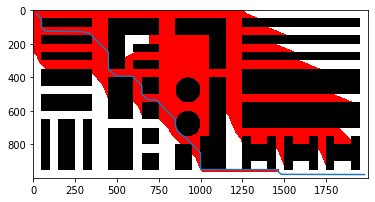

In [11]:
astar_solver = aStar(warehouse_map)
start_p = np.array([20, 20])
end_p = np.array([980, 1980])
print("start astar searching on original map")
path = np.array(astar_solver.path_plan(start_p, end_p, visual=False, draw_count=100000))
filter_path = np.array(astar_solver.line_fitter(path))
# render the path and the final result
path_y = filter_path.T[0]
path_x = filter_path.T[1]
sio.savemat("./warehouse1/astar_warehouse.mat", {'astar_result_original': warehouse_map.color_stat})
img_result = astar_solver.map2d.render_image()
plt.imshow(img_result)
plt.plot(path_x, path_y)
plt.savefig('./warehouse1/warehouse_astar_original.png', dpi=400)
plt.show()
# print final result
# print("Filtered path: {}".format(filter_path))

start astar searching on ballooned map
astar finished!


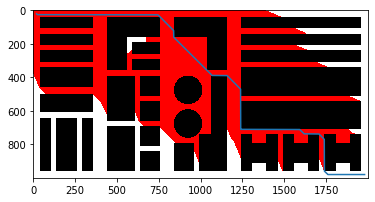

In [15]:
astar_solver = aStar(warehouse_balloon)
start_p = np.array([20, 20])
end_p = np.array([980, 1980])
print("start astar searching on ballooned map")
path = np.array(astar_solver.path_plan(start_p, end_p, visual=False, draw_count=100000))
filter_path = np.array(astar_solver.line_fitter(path))
filter_path = np.array([[20, 20],
                         [25, 26],
                         [26, 746],
                         [120, 839],
                         [160, 840],
                         [388, 1069],
                         [389, 1159],
                         [470, 1239],
                         [710, 1240],
                         [710, 1241],
                         [711, 1592],
                         [737, 1619],
                         [738, 1708],
                         [770, 1739],
                         [960, 1740],
                         [980, 1761],
                         [980, 1980]])
# render the path and the final result
path_y = filter_path.T[0]
path_x = filter_path.T[1]
sio.savemat("./warehouse1/astar_warehouse_balloon.mat", {'astar_result_balloon': warehouse_balloon.color_stat})
img_result = astar_solver.map2d.render_image()
plt.imshow(img_result)
plt.plot(path_x, path_y)
plt.savefig('./warehouse1/warehouse_astar_balloon.png', dpi=400)
plt.show()

calculate start.
calculate finish, start rendering.


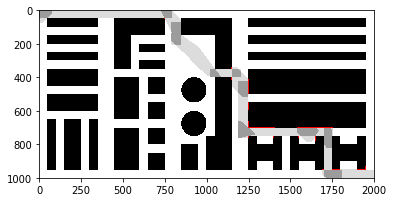

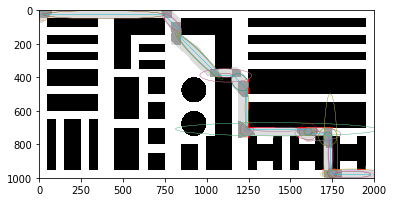

In [6]:
path_out = [[20, 20],
             [25, 26],
             [26, 746],
             [120, 839],
             [160, 840],
             [388, 1069],
             [389, 1159],
             [470, 1239],
             [710, 1240],
             [710, 1241],
             [711, 1592],
             [737, 1619],
             [738, 1708],
             [770, 1739],
             [960, 1740],
             [980, 1761],
             [980, 1980]]
warehouse_map =  map2D(warehouse())
path = np.array(path_out)
path_y = path.T[0]
path_x = path.T[1]
print("calculate start.")
safety_ellipse = safetyEllipse(warehouse_map, 50)
cons_list, ellipse_list = safety_ellipse.ellipse_generate(path)
print("calculate finish, start rendering.")
img_result = safety_ellipse.map2d.render_image()
plt.imshow(img_result)
plt.ylim(0, 1000)
plt.xlim(0, 2000)
plt.gca().invert_yaxis()
plt.savefig('./warehouse1/warehouse_no_ellipse.png', dpi=400)
plt.show()

plt.imshow(img_result)
for elli_stack in ellipse_list:
    for ellipse in elli_stack:
        single_ellipse = safety_ellipse.ellipse_mesh(ellipse)
        plt.plot(single_ellipse[0], single_ellipse[1], linewidth=0.3)
plt.ylim(0, 1000)
plt.xlim(0, 2000)
plt.plot(path_x, path_y, linewidth=0.5)
plt.gca().invert_yaxis()
plt.savefig('./warehouse1/warehouse_ellipse.png', dpi=400)
plt.show()
sio.savemat("./warehouse1/warehouse_constraints_data.mat",
            {'path': path_out,
             'constraints': cons_list})